## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results, on='Mouse ID',how="outer" )

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.


combined_data['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mid = combined_data.loc[combined_data['Mouse ID']== 'g989',]
duplicate_mid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_cleandf = combined_data[combined_data['Mouse ID'].isin(duplicate)==False]
new_cleandf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
count = new_cleandf['Mouse ID'].nunique()
count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

t = new_cleandf.groupby(['Drug Regimen'])

t_mean = t['Tumor Volume (mm3)'].mean()
t_med = t['Tumor Volume (mm3)'].median()
t_var = t['Tumor Volume (mm3)'].var()
t_std = t['Tumor Volume (mm3)'].std()
t_sem = t['Tumor Volume (mm3)'].sem()

tumordf = pd.DataFrame({
                        "Mean Tumor Volume": t_mean,
                        "Median Tumor Volume" : t_med,
                        "Tumor Volume Variance" : t_var,
                        "Tumor Volume Std. Dev." : t_std,
                        "Tumor Volume Std. Err." : t_sem
                        })
tumordf


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

new_tumordf = new_cleandf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
new_tumordf

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

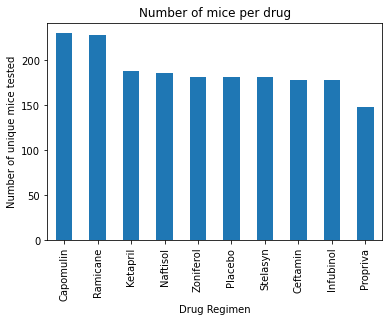

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

count = new_cleandf.groupby(["Drug Regimen"]).count()["Mouse ID"] 
count_chart = count.sort_values(ascending=False).plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_title("Number of mice per drug")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of unique mice tested")


plt.show()
plt.tight_layout()

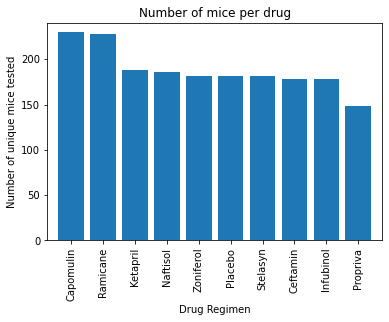

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse =new_cleandf.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse = mouse.sort_values(ascending=False)

x_axis = np.arange(len(mouse))
fig1, ax1 = plt.subplots()
plt.bar(x_axis, mouse, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril','Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn','Ceftamin', 'Infubinol','Propriva' ],  rotation='vertical')

plt.title("Number of mice per drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice tested")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse)+10)

plt.show()
plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

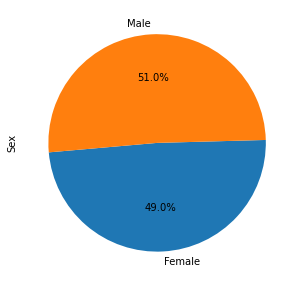

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

distribution = new_cleandf.groupby(['Sex'])['Sex'].count()
distribution.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

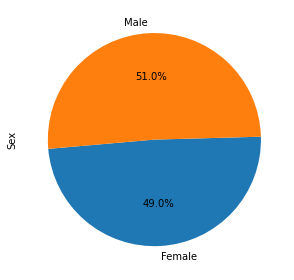

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(distribution, labels=('Female', 'Male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.tight_layout() 
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

by_mouse_df = new_cleandf.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse_df.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(new_cleandf,on=['Mouse ID','Timepoint'],how="left")



In [23]:

    
def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen} potential outliers",outliers)
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")
    
    

Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


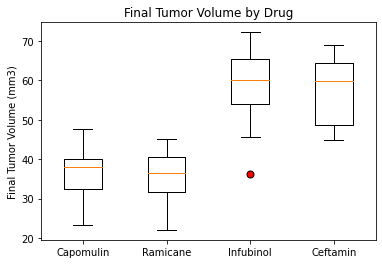

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title('Final Tumor Volume by Drug')
flierprops = dict(marker='o', markerfacecolor='r', markersize=7, markeredgecolor='black')
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=flierprops )
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
